# Assessed Problem #1

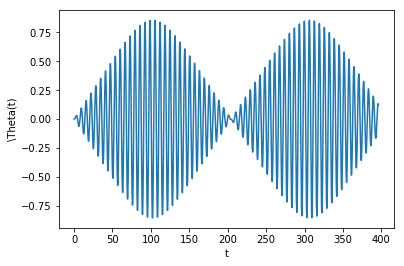

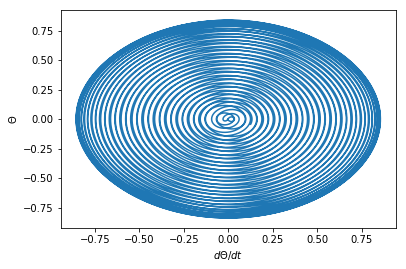

In [63]:
#Libraries
from numpy             import *
from run_kut4          import *
from matplotlib.pyplot import *
from scipy.integrate   import *
#

#Subroutines
def F(u,x):
    x1,x2 = u
    X1 = x2
    X2 = -sin(x1) + y*cos(x1)*sin(x)
    return X1,X2
def G(x,g):
    return -sin(g) + y*cos(g)*sin(B*x)
#

#Constants
B     = 10 * sqrt(10E-2/9.81)
y     = 10E-2 * 2/ 9.81

f0 = 0
_f0 = 0
#

#Computation
X = arange(0,40/sqrt(10E-2/9.81),0.01)
Y = odeint(F,[0,0],X) #Can't solve for  the runda kunta
plot(X,Y[:,0])
xlabel("t")
ylabel("\Theta(t)")
show()
plot(Y[:,0],Y[:,1])
xlabel("$ {d\Theta}/{dt}$")
ylabel("$ \Theta $")
show()
#